In [5]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer   # ✅ THIS is required
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [2]:
from google.colab import files
uploaded = files.upload()

# Save as a smaller working file (only 50k rows)
import pandas as pd
df = pd.read_csv("Fraud.csv", nrows=20000)
df.to_csv("Fraud_small.csv", index=False)


Saving Fraud.csv to Fraud.csv


In [3]:
# STEP 3: Drop useless columns
df = df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis=1)

# Features and Target
X = df.drop("isFraud", axis=1)
y = df["isFraud"]


In [6]:
# STEP 4: Define features
num_features = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]
cat_features = ["type"]

# Column transformer (scaling + encoding)
preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])


In [7]:
# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (14000, 7) Test size: (6000, 7)


In [8]:
# Logistic Regression (fast)
clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=200, class_weight="balanced", random_state=42))
])

clf.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=200,
                                    random_state=42))])

Accuracy: 0.8391666666666666
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      5976
           1       0.02      1.00      0.05        24

    accuracy                           0.84      6000
   macro avg       0.51      0.92      0.48      6000
weighted avg       1.00      0.84      0.91      6000



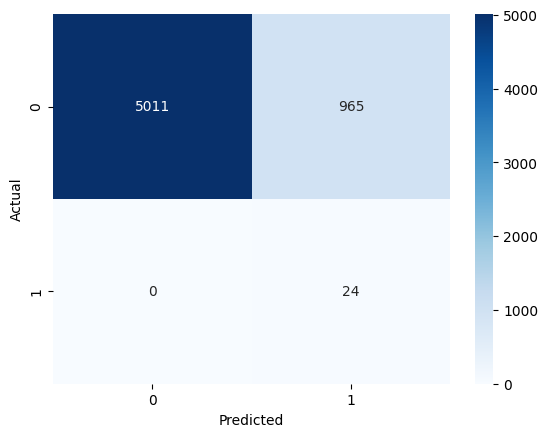

In [9]:
# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()


In [10]:
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()


,precision,recall,f1-score,support
0,1.000000,0.838521,0.912169,5976.000000
1,0.024267,1.000000,0.047384,24.000000
accuracy,0.839167,0.839167,0.839167,0.839167
macro avg,0.512133,0.919260,0.479776,6000.000000
weighted avg,0.996097,0.839167,0.908710,6000.000000


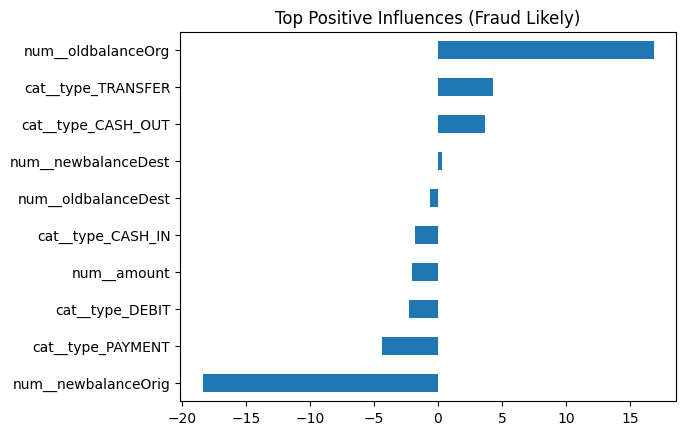

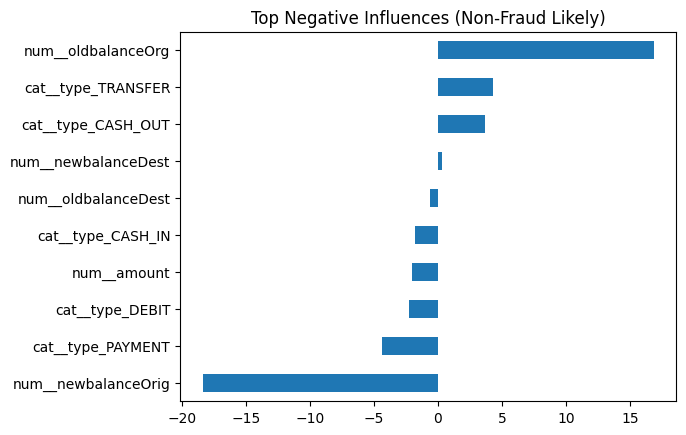

In [12]:
# Get trained model from pipeline
model = clf.named_steps["model"]

# Get feature names from preprocessing
feature_names = clf.named_steps["preprocess"].get_feature_names_out()

# Get coefficients (impact of each feature)
coefficients = model.coef_[0]

# Put into a Series for easy analysis
feat_importances = pd.Series(coefficients, index=feature_names)

# Plot top 10 features pushing towards "fraud"
feat_importances.sort_values().tail(10).plot(kind="barh", title="Top Positive Influences (Fraud Likely)")
plt.show()

# Plot top 10 features pushing towards "non-fraud"
feat_importances.sort_values().head(10).plot(kind="barh", title="Top Negative Influences (Non-Fraud Likely)")
plt.show()



In [13]:
plt.savefig("confusion_matrix.png")


<Figure size 640x480 with 0 Axes>

In [14]:
import joblib
joblib.dump(clf, "fraud_detection_logistic.pkl")


['fraud_detection_logistic.pkl']